
# 💼 Attrition in an Organization || Why Workers Quit?
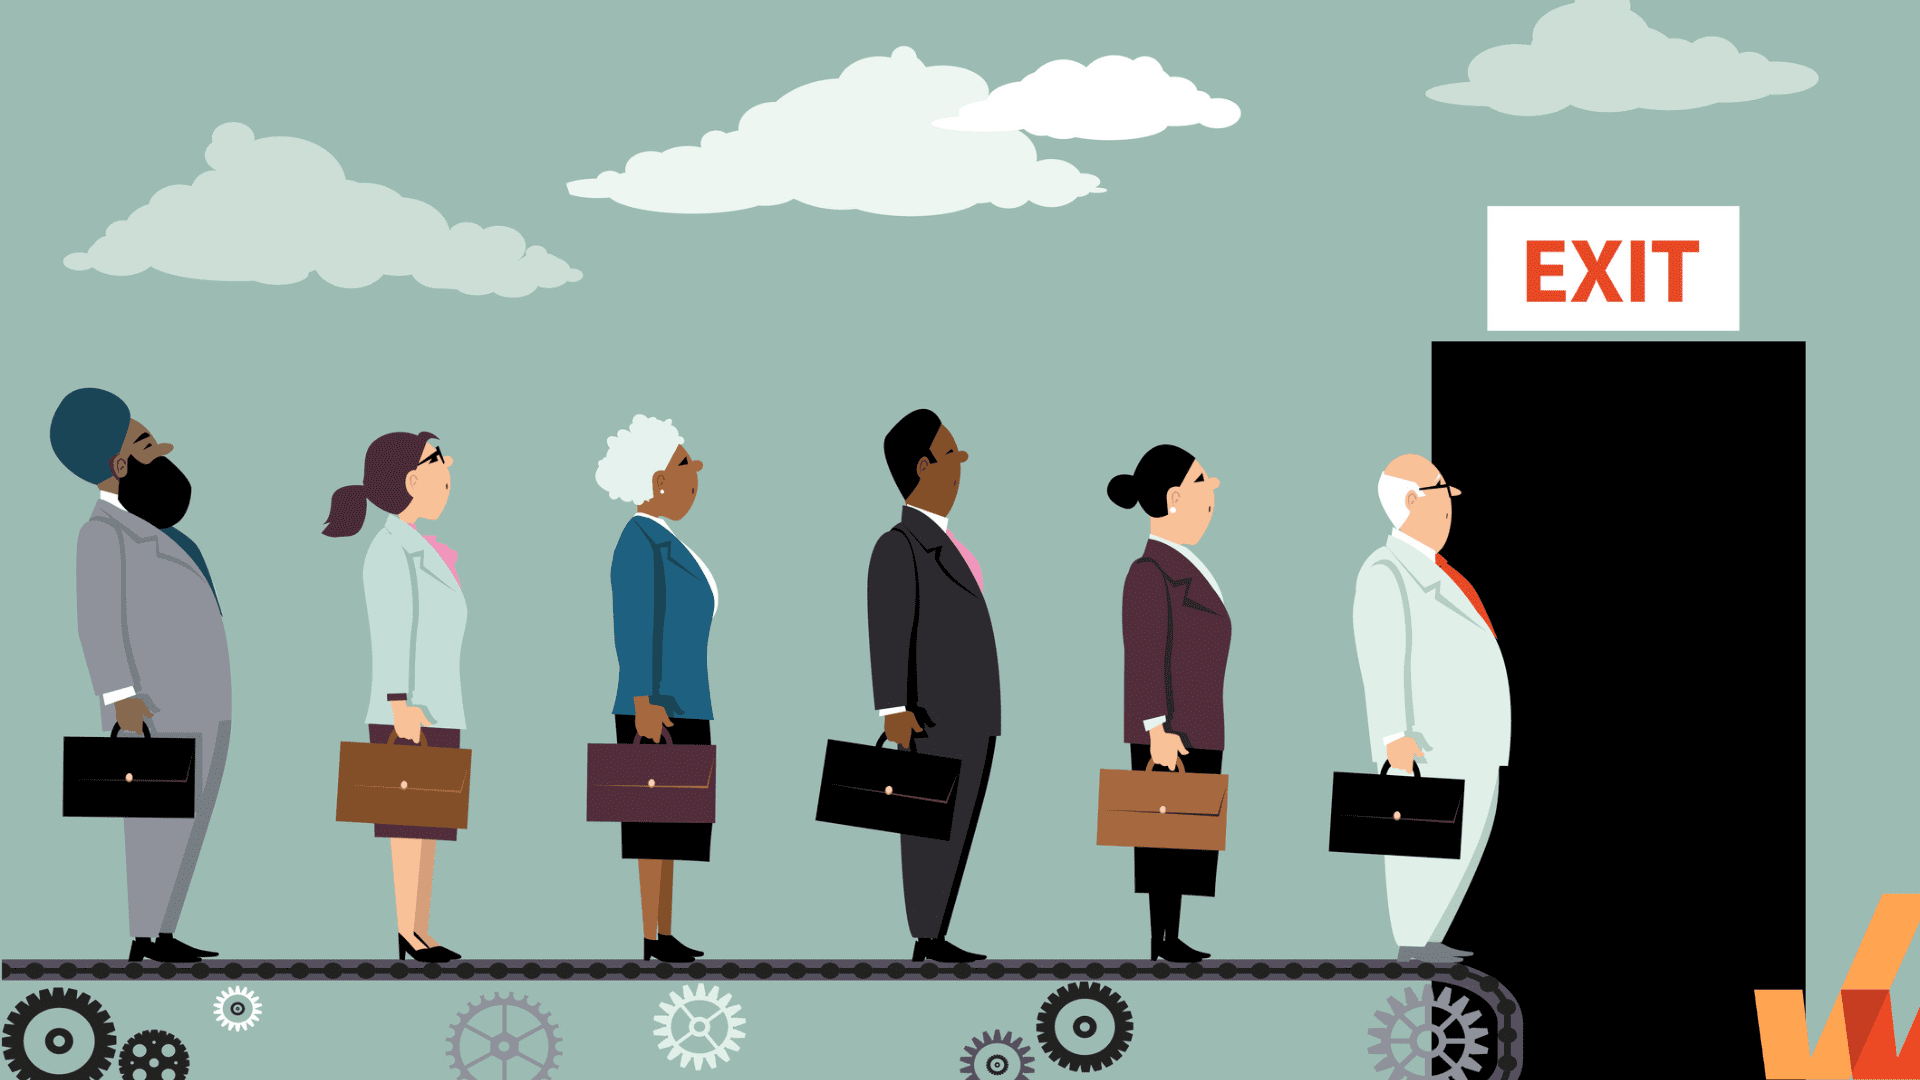
Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

*   Expensive in terms of both money and time to train new employees.
*   Loss of experienced employees
*   Impact in productivity
*   Impact profit



#  Importing File

In [68]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data =pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [70]:
data1=data.copy()    # keeping a copy of dataset

In [72]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1460 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1465 non-null   object 
 5   DistanceFromHome          1466 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1467 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [75]:
data.shape

(1470, 35)

In [76]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1466.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.200546,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.110796,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Null value checking & removing

In [19]:
data.isna().sum()

Age                          0
Attrition                    0
BusinessTravel              10
DailyRate                    0
Department                   5
DistanceFromHome             4
Education                    0
EducationField               3
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [20]:
# numerical col
data['DistanceFromHome'] = data['DistanceFromHome'].fillna(np.mean(data['DistanceFromHome']))
data.isnull().sum()

Age                          0
Attrition                    0
BusinessTravel              10
DailyRate                    0
Department                   5
DistanceFromHome             0
Education                    0
EducationField               3
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [21]:
# categorical cols
def fill_nulls_object_columns(df):
    for column in df.select_dtypes(include=['object']).columns:
        mode = df[column].mode()[0]  # Get the most frequent value (mode)
        df[column].fillna(mode, inplace=True)
    return df

data=fill_nulls_object_columns(data)

In [22]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Outlier checking & Removal

In [23]:
cols=['Age', 'DailyRate',
       'DistanceFromHome', 'Education',  'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel',  'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

<ipython-input-24-821a348ac451>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


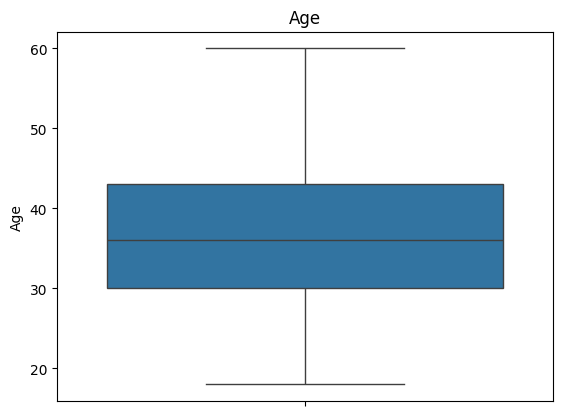

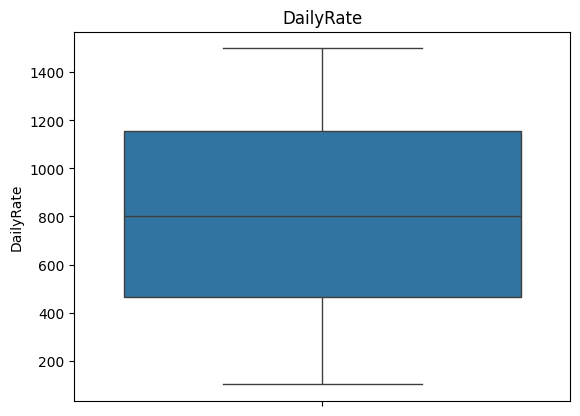

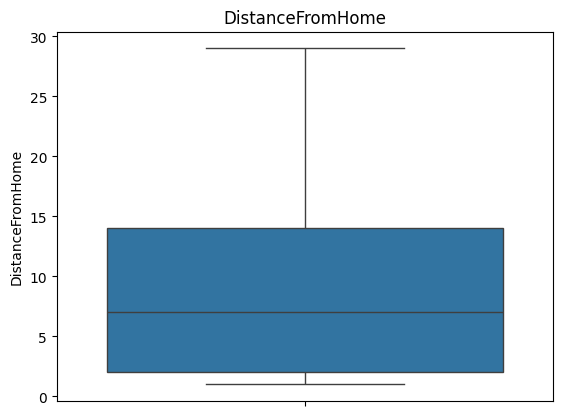

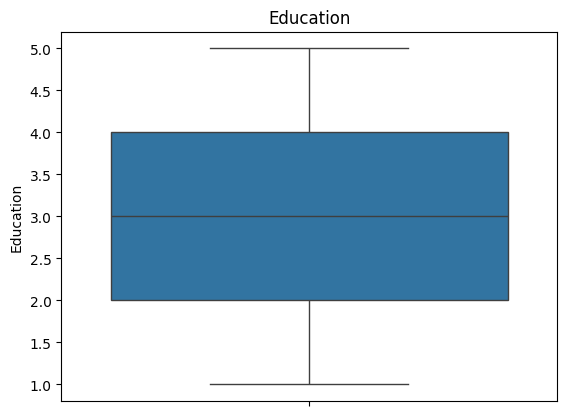

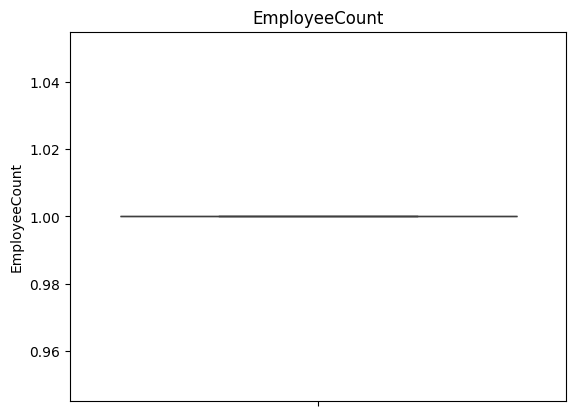

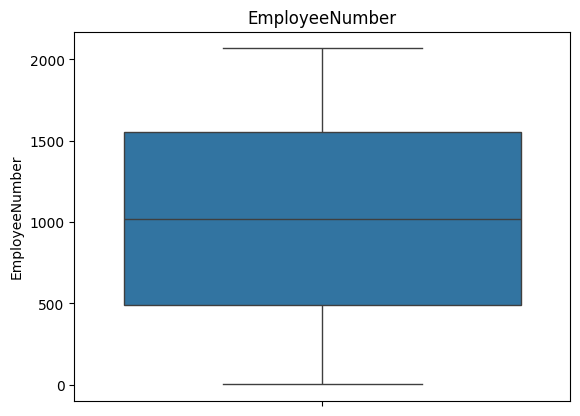

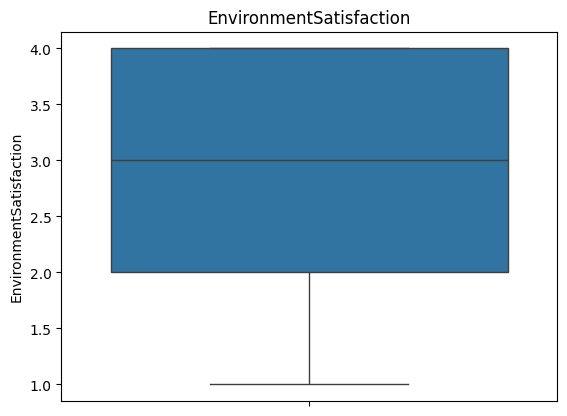

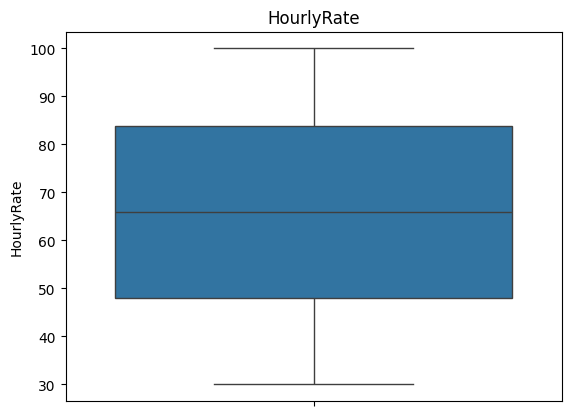

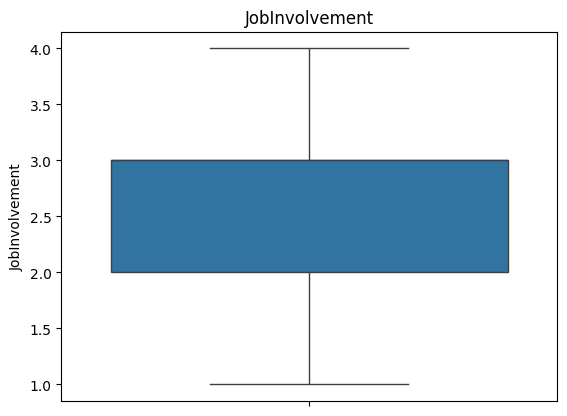

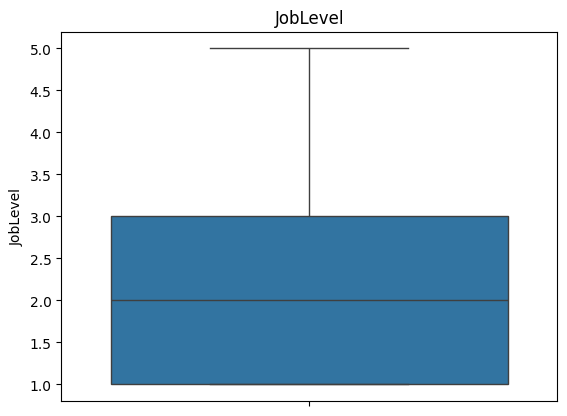

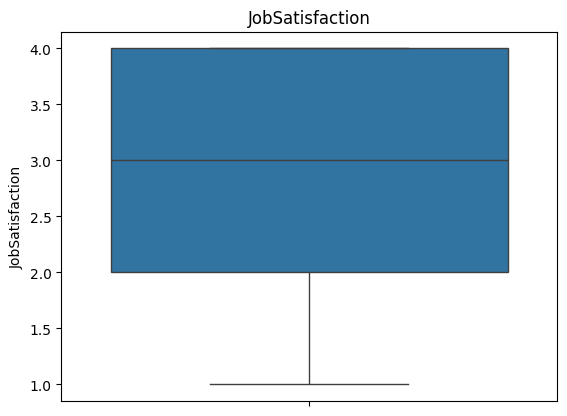

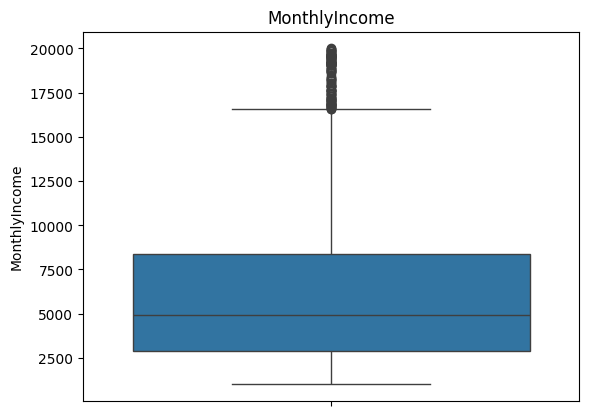

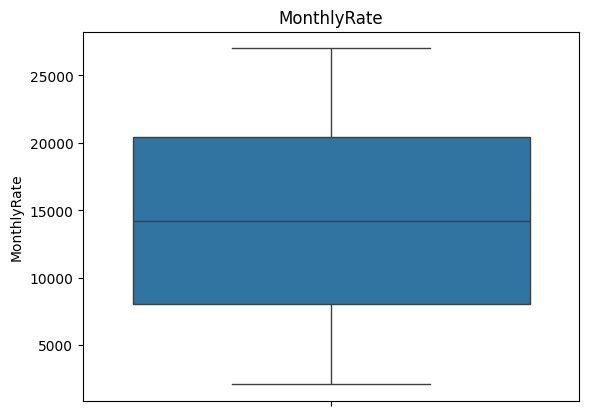

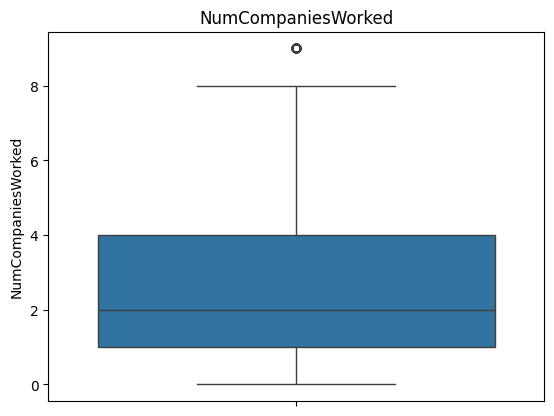

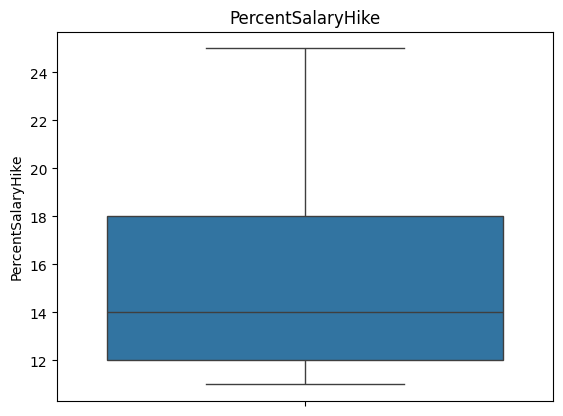

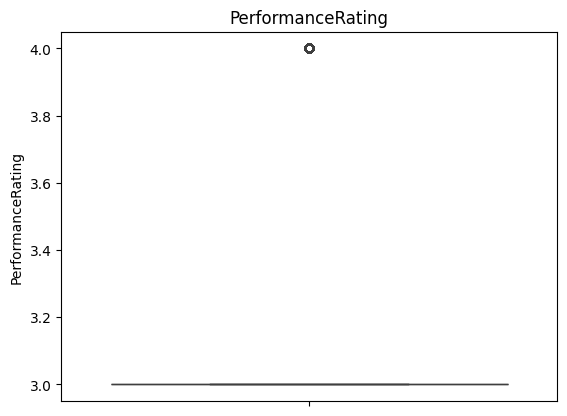

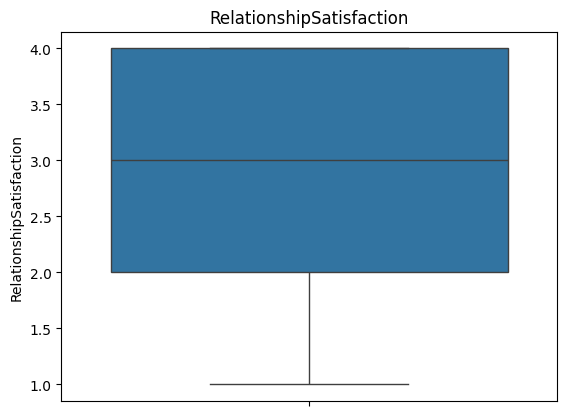

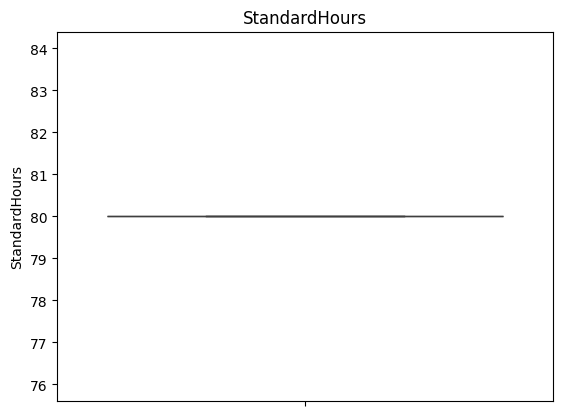

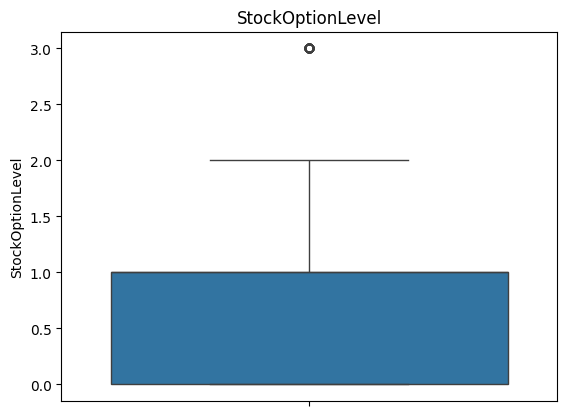

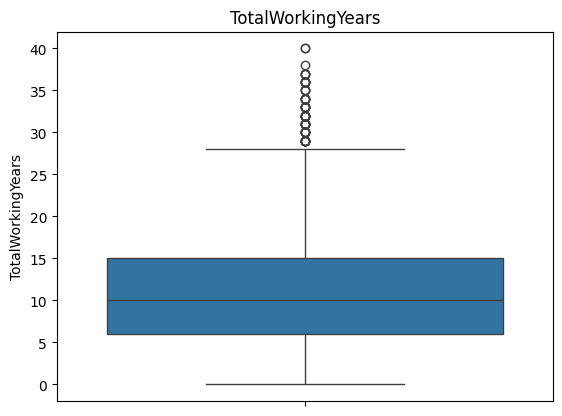

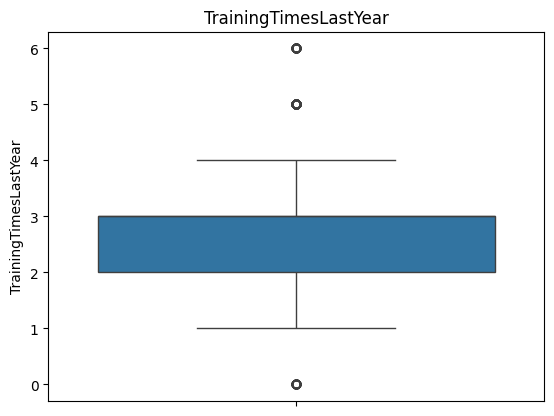

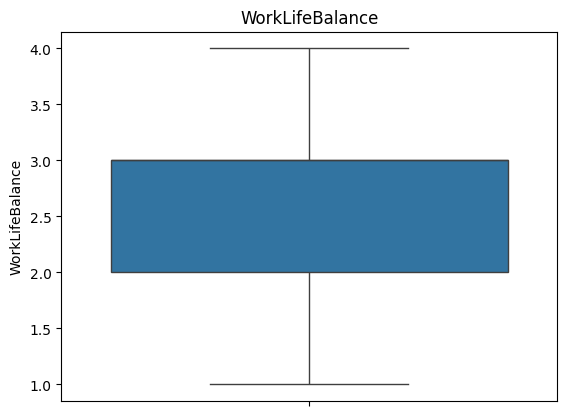

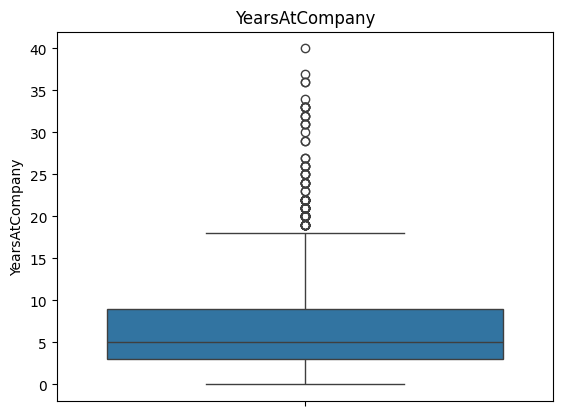

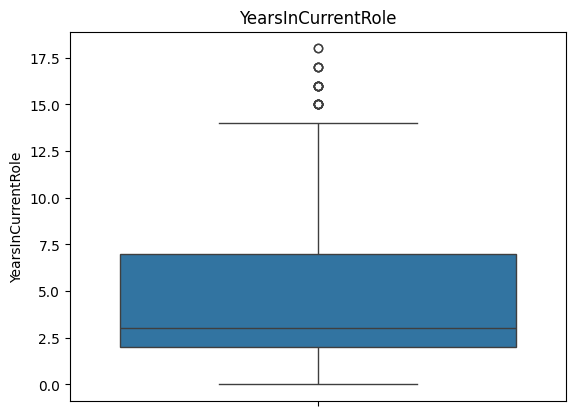

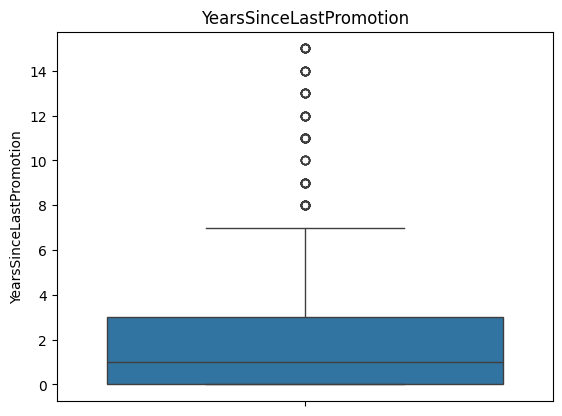

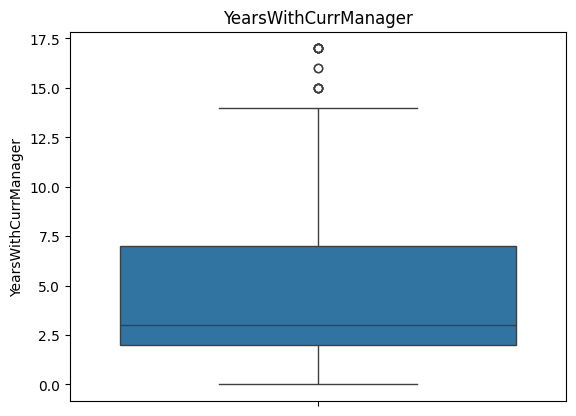

In [24]:
for i in cols:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)

In [25]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q2 = df[column].quantile(0.50)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
        outliers[column] = outlier_indices
    return outliers

In [26]:
outliers_iqr = detect_outliers_iqr(data)

print("\nOutliers detected using IQR:")
for column, indices in outliers_iqr.items():
    if len(indices) > 0:
        print(f"{column}: {len(indices)} outliers")


Outliers detected using IQR:
MonthlyIncome: 114 outliers
NumCompaniesWorked: 52 outliers
PerformanceRating: 226 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers


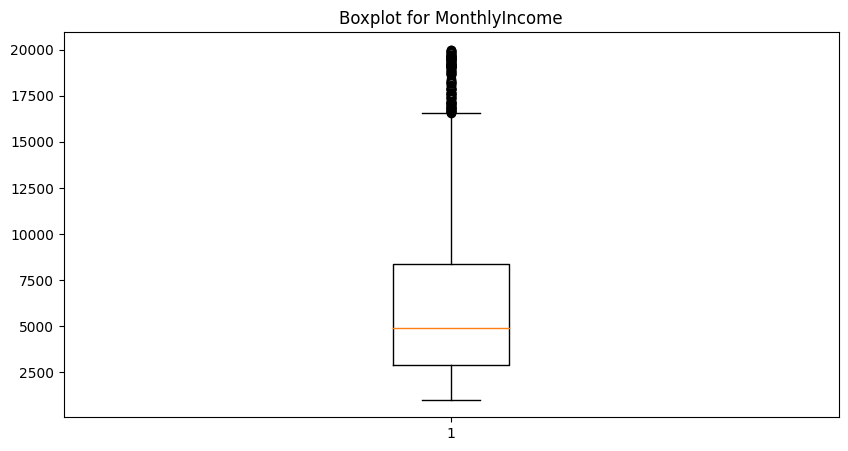

In [27]:
# To visualize outliers in a specific column, you can use a boxplot

def visualize_outliers(df, column):
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[column].dropna())
    plt.title(f'Boxplot for {column}')
    plt.show()

# Example: Visualize outliers in 'MonthlyIncome'
visualize_outliers(data, 'MonthlyIncome')

In [28]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for column in df.select_dtypes(include=[np.number]).columns:
        while True:
            Q1 = df_clean[column].quantile(0.25)
            Q2 = df_clean[column].median()
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            filter = (df_clean[column] >= (Q1 - 1.5 * IQR)) & (df_clean[column] <= (Q3 + 1.5 * IQR))
            new_df_clean = df_clean[filter]
            if new_df_clean.shape[0] == df_clean.shape[0]:
                break
            df_clean = new_df_clean
    return df_clean

In [29]:
# Remove outliers using IQR
data = remove_outliers_iqr(data)

In [30]:
# Display the shape of the cleaned datasets
print("Original dataset shape:", data1.shape)
print("Cleaned dataset shape using IQR:", data.shape)

Original dataset shape: (1470, 35)
Cleaned dataset shape using IQR: (483, 35)


# EDA

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 2 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       483 non-null    int64  
 1   Attrition                 483 non-null    object 
 2   BusinessTravel            483 non-null    object 
 3   DailyRate                 483 non-null    int64  
 4   Department                483 non-null    object 
 5   DistanceFromHome          483 non-null    float64
 6   Education                 483 non-null    int64  
 7   EducationField            483 non-null    object 
 8   EmployeeCount             483 non-null    int64  
 9   EmployeeNumber            483 non-null    int64  
 10  EnvironmentSatisfaction   483 non-null    int64  
 11  Gender                    483 non-null    object 
 12  HourlyRate                483 non-null    int64  
 13  JobInvolvement            483 non-null    int64  
 14  JobLevel      

In [32]:
data.shape

(483, 35)

In [33]:
data.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

These are categorical variables in the dataset

In [34]:
data['Attrition'].value_counts()

Attrition
No     377
Yes    106
Name: count, dtype: int64

In [35]:
# encoding the attrition column to use it for EDA
data['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
13,34,0,Travel_Rarely,1346,Research & Development,19.0,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2
14,28,1,Travel_Rarely,103,Research & Development,24.0,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
17,22,0,Non-Travel,1123,Research & Development,16.0,2,Medical,1,22,...,2,80,2,1,2,2,1,0,0,0
19,38,0,Travel_Rarely,371,Research & Development,2.0,3,Life Sciences,1,24,...,3,80,0,6,3,3,3,2,1,2


0 - No

>


1 - Yes

In [63]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("====================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 405
Department: Number of unique values 3
DistanceFromHome: Number of unique values 30
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 483
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 3
JobRole: Number of unique values 7
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 463
MonthlyRate: Number of unique values 479
NumCompaniesWorked: Number of unique values 9
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 9
PerformanceRating: Number of unique v

We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 483 unique values.

# Categorical Features

In [37]:
object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("====================================")

BusinessTravel : ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
BusinessTravel
Travel_Rarely        347
Travel_Frequently     92
Non-Travel            44
Name: count, dtype: int64
Department : ['Research & Development' 'Sales' 'Human Resources']
Department
Research & Development    299
Sales                     159
Human Resources            25
Name: count, dtype: int64
EducationField : ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       187
Medical             148
Marketing            60
Technical Degree     47
Other                29
Human Resources      12
Name: count, dtype: int64
Gender : ['Male' 'Female']
Gender
Male      311
Female    172
Name: count, dtype: int64
JobRole : ['Laboratory Technician' 'Research Scientist' 'Sales Representative'
 'Sales Executive' 'Healthcare Representative' 'Manufacturing Director'
 'Human Resources']
JobRole
Research Scientist           124
Sales Executive              104
La

# Numerical Features

In [38]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() < 30:
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("====================================")

Attrition : [1 0]
Education : [2 3 1 4 5]
EmployeeCount : [1]
EnvironmentSatisfaction : [4 2 3 1]
JobInvolvement : [2 3 4 1]
JobLevel : [1 2 3]
JobSatisfaction : [3 4 1 2]
NumCompaniesWorked : [6 0 5 1 2 4 7 3 8]
PercentSalaryHike : [15 11 14 13 16 12 19 17 18]
PerformanceRating : [3]
RelationshipSatisfaction : [2 3 4 1]
StandardHours : [80]
StockOptionLevel : [0 1 2]
TotalWorkingYears : [ 7  3  6  1  8  2 10  5  4 17 12  0 16  9 13 15 11 14]
TrainingTimesLastYear : [3 2 4 1]
WorkLifeBalance : [3 2 4 1]
YearsAtCompany : [ 0  2  4  1  3  5  6 10  7  9  8]
YearsInCurrentRole : [0 2 1 3 5 4 8 7 6 9]
YearsSinceLastPromotion : [0 1 2]
YearsWithCurrManager : [0 2 3 4 1 6 5]


In [39]:
cont_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 103, Maximum: 1498
EmployeeNumber : Minimum: 4, Maximum: 2068
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1051, Maximum: 10448
MonthlyRate : Minimum: 2097, Maximum: 26959


# Analysis

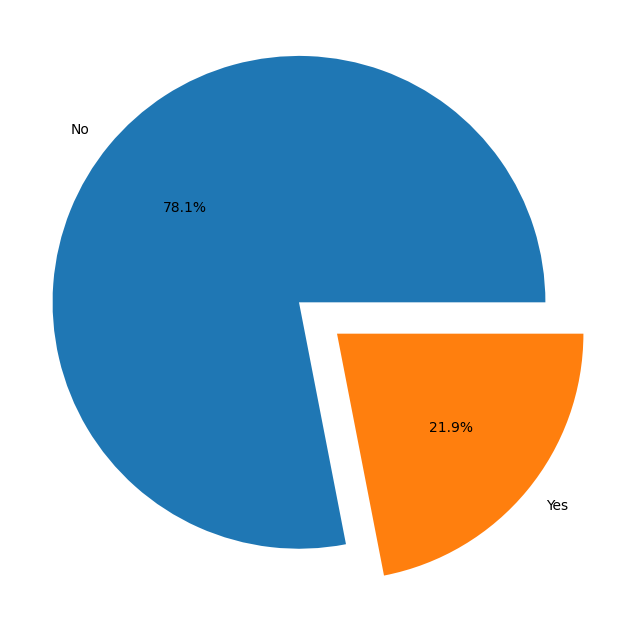

In [43]:
plt.figure(figsize=(8,8))
pie = data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

78% of the employees in the dataset have not left the company.

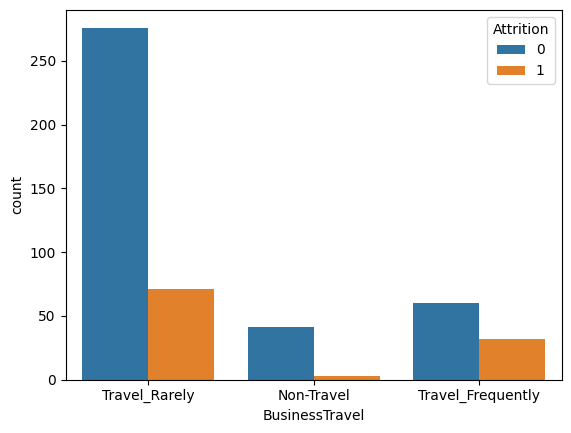

In [45]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=data);

Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.

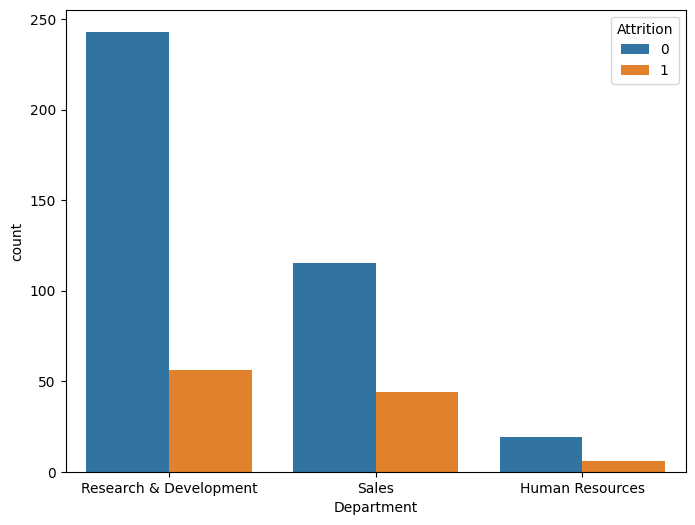

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=data);

In [47]:
data['Department'].value_counts()

Department
Research & Development    299
Sales                     159
Human Resources            25
Name: count, dtype: int64

Most attritions are from the research & development department only for sales department to come second by a small margin. Human resources has the least number of attritions. But we need to keep in mind that R&D has a lot more employees than sales and HR.

If we considered percentage of attritions per department, we would see that the HR department has most attritions.

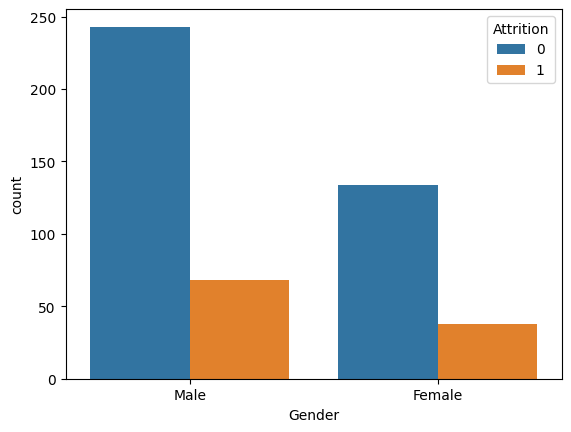

In [49]:
sns.countplot(x='Gender', hue='Attrition', data=data);

Clearly there are more males in the organisation than females, so attritions are higher but slightly. I don't think gender is too significant a factor behind attritions.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Laboratory Technician'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Sales Executive'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manufacturing Director'),
  Text(6, 0, 'Human Resources')])

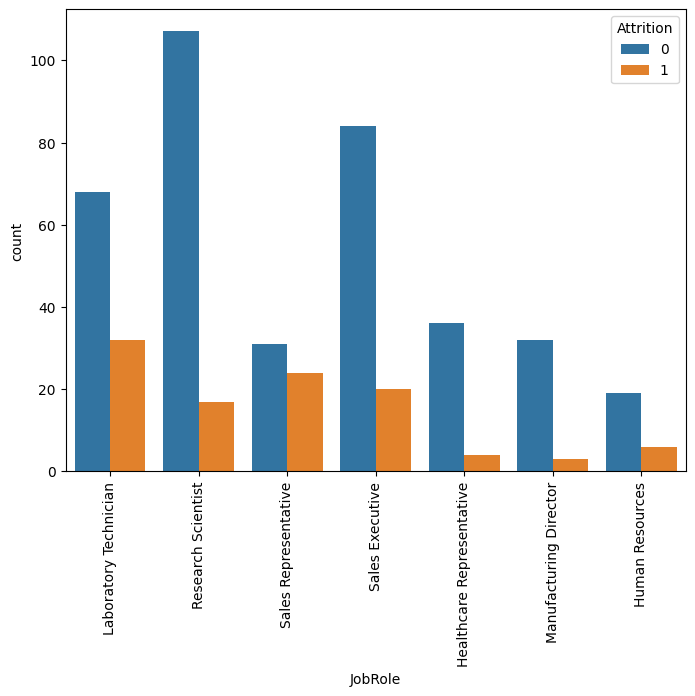

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=data);
plt.xticks(rotation=90)

Among job roles, most laboratory technicians have departed from their jobs, only for research scientists, sales executives and sales representatives (% wise) to trail behind. We could look into salaries of each job roles and see if that may be the reason.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Laboratory Technician'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Sales Executive'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manufacturing Director'),
  Text(6, 0, 'Human Resources')])

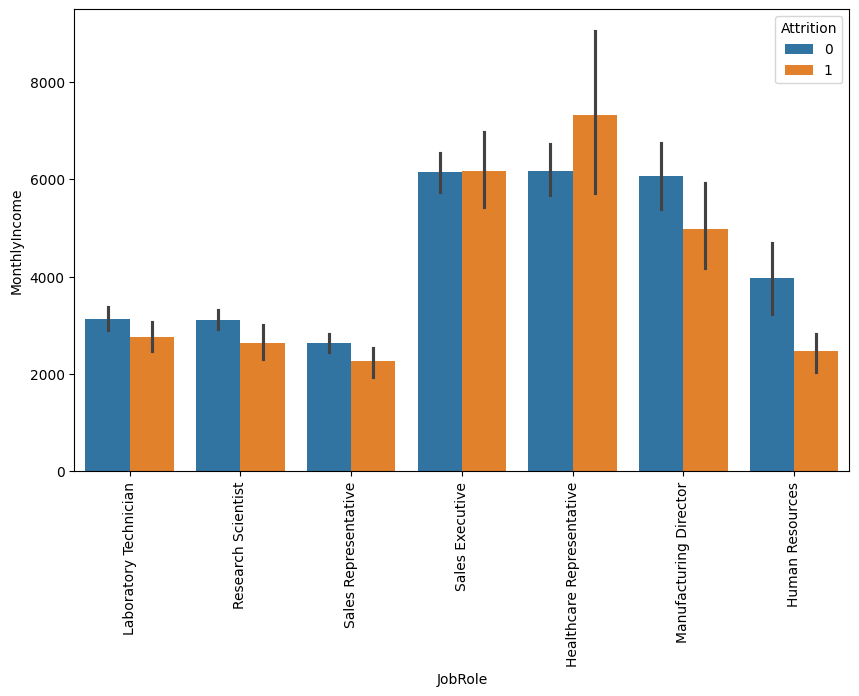

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=data)
plt.xticks(rotation=90)

As doubted, laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.

Also, as we had seen earlier, the HR department had the most attritions and we can see they have very low salaries as well so once again, this is something to think about.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Medical'),
  Text(2, 0, 'Life Sciences'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

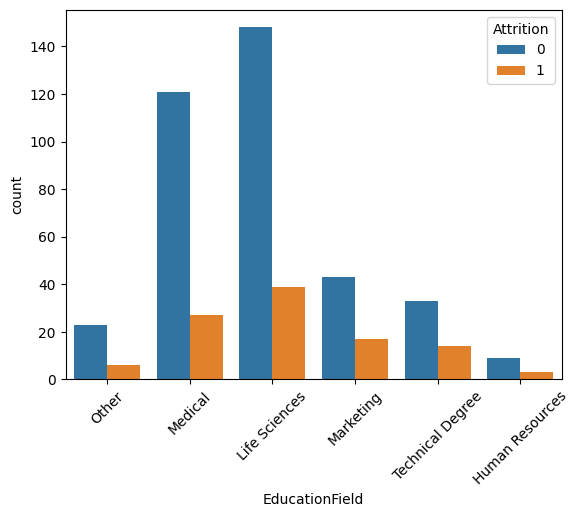

In [55]:
sns.countplot(x='EducationField', hue='Attrition', data=data);
plt.xticks(rotation=45)

I don't think the degrees of employees really matter here as most of the number of attritions are similar.

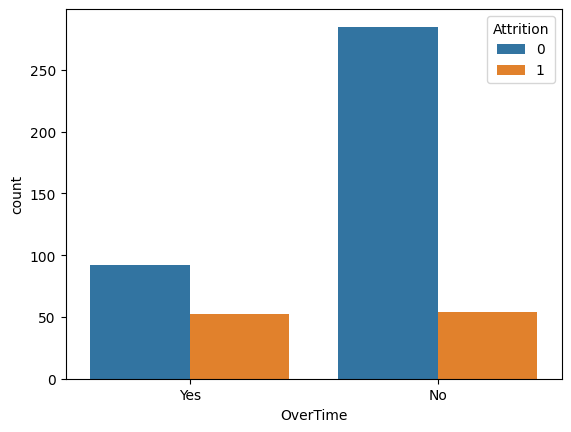

In [57]:
sns.countplot(x='OverTime', hue='Attrition', data=data);

Overtime hours aren't a very crucial factor either.

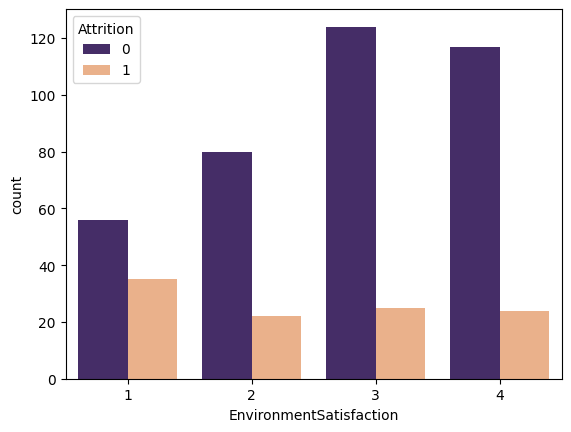

In [62]:
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition', data=data ,palette=['#432371',"#FAAE7B"]);

Most employees seem to be satisfied with the working environment.

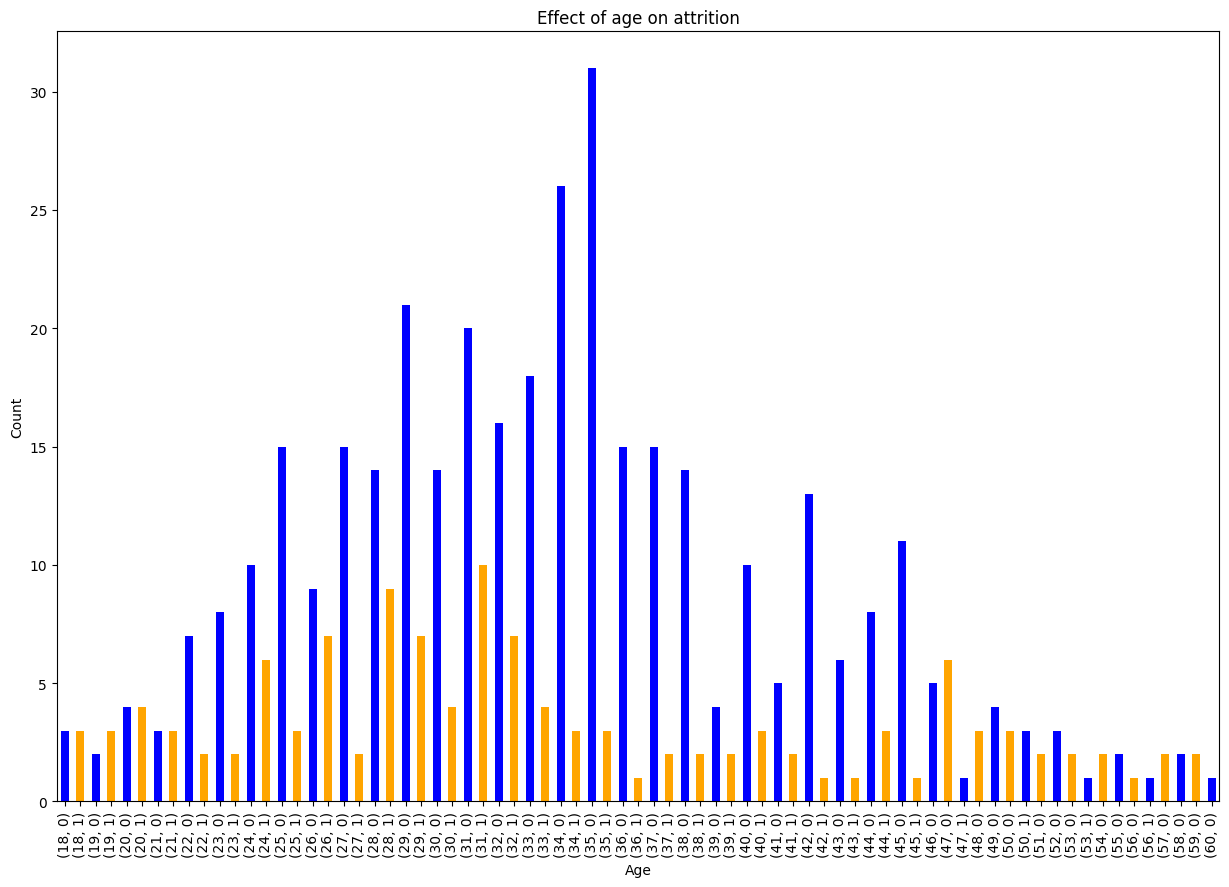

In [67]:
age_attr=data.groupby(['Age','Attrition']).size()
unstacked=age_attr.unstack()

age_attr.plot(kind='bar', figsize=(15, 10) , color= ['blue','orange'])


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Effect of age on attrition')

plt.show()

Person having age from 34 - 38 haved stayed in the company more than others.